In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
data=pd.read_csv("co2_emmision_by_vehicle.csv")
data.head(10)

In [ ]:
data.info()

In [65]:
data.shape

(6654, 7)

In [63]:
data.columns

Index(['car_id', 'Transmission', 'Engine_Size (cm3)', 'Fuel_Type',
       'Powertrain', 'CO2_emission', 'Engine_Size(cm3)(bins)'],
      dtype='object')

In [67]:
data.isnull().sum()

car_id                    0
Transmission              0
Engine_Size (cm3)         0
Fuel_Type                 0
Powertrain                0
CO2_emission              0
Engine_Size(cm3)(bins)    0
dtype: int64

In [69]:
data.describe()

,car_id,Engine_Size (cm3),CO2_emission,Engine_Size(cm3)(bins)
count,6654.000000,6654.000000,6654.000000,6654.000000
mean,3365.296513,1820.777577,157.148182,1170.226631
std,1950.893362,801.590283,51.917004,877.612965
min,1.000000,0.000000,0.000000,0.000000
25%,1677.250000,1333.000000,131.000000,0.000000
50%,3354.500000,1798.000000,151.000000,1350.000000
75%,5025.750000,1997.000000,180.000000,1350.000000
max,6756.000000,6749.000000,380.000000,5399.000000


MACHINE LEARNING;SUPERVISED LEARNING METHOD
MULTIPLE LINEAR REGRESSION

STAGES OF MACHINE LEARNING

1.Define the problem 2.Build the dataset 3.Train the dataset 4.Evaluate the model 5.Use/Deploy the model


Step 1; Defining the problem

Here, we define what our task is, and consider the best machine learning model to use that can solve our problem. We then formulate the hypothesis, and write the formulas where possible

In this case, we would like to model the relationship between the "CO2_emission" amount and the set of predictors that include "Transmission", "Engine_Size (cm3)", "Fuel_Type", "Powertrain", and "Engine_Size(cm3)(bins)"

Our model fit will follow a multiple linear regression as folows

CO2_emission = Bo+B1(Transmission)+B2(Engine_Size (cm3))+B3(Fuel_Type)+B4(Powertrain)+B5(Engine_Size(cm3)(bins))
The hypotheses will be:

    For the model fit

Ho: The model fit is NOT significant (B1=B2=...=B7)

vs

H1: The model fit is significant(At least one Bj!=0 for j=1,2,...,7)

    For each predictor:

Ho: Holding other factors constant, Transmission DOES NOT affect CO2_emission (B1 = 0) : Holding other factors constant, Engine_Size (cm3) DOES NOT affect CO2_emission (B2 = 0) : Holding other factors constant, Fuel_Type DOES NOT affect CO2_emission (B3 = 0) : Holding other factors constant, Powertrain DOES NOT affect CO2_emission (B4 = 0) : Holding other factors constant, Engine_Size(cm3)(bins) DOES NOT affect CO2_emission (B5 = 0) : 

vs

H1: Holding other factors constant, Transmission affects CO2_emission (B1 != 0) : Holding other factors constant, Engine_Size (cm3) affects CO2_emission (B2 != 0) : Holding other factors constant, Fuel_Type affects CO2_emission (B3 != 0) : Holding other factors constant, Powertrain affects CO2_emission (B4 != 0) : Holding other factors constant, Engine_Size(cm3)(bins) affects CO2_emission (B5 != 0) 


Step 2;BUILDING THE DATASET



    1.Data Collection then importation

    2.Data cleaning by removing outliers, removing/replacing null values, feature engineering/data transformation of non numerical columns

    3.Descriptive statistics

    4.Exploratory data analysis



In [129]:
print(data['Transmission'].dtype)
print(data["Engine_Size (cm3)"].dtype)
print(data['Fuel_Type'].dtype)
print(data['Powertrain'].dtype)
print(data['Engine_Size(cm3)(bins)'].dtype)

object
int64
object
object
int64


In [131]:
print(data['Transmission'].unique())
print(data["Engine_Size (cm3)"].unique())
print(data['Fuel_Type'].unique())
print(data['Powertrain'].unique())
print(data['Engine_Size(cm3)(bins)'].unique())

['Manual' 'Automatic']
[ 999 1998  998 1333 1368  898 1330 3982 1386 1199 1598 1332 1242  875
 1084 1496 2261 5038  988 1498 1996 1197 2995 1353 1591 1482 1248 1798
 3456 1999 2000 2001 2002 2191 1991 1490 1193 1590 1499 1984 1597 1497
 1618 1477 1995 2891 1799 5204 5935 3996 5950 6162 3902 3855 6252 6449
 2497 5000 3342 4999 4969 2979 4691 2003 2488 3799 3994 2999 4663 5980
 2998 6592 6749 1600 2498 2996 1993 1997 1461 2143 2925 1956 2199 2151
 2993 4367 2987 1759 2192 2193 2194 2195 2196 1749 1968 2157 2755 1969
 1950 3990  996 1580 2487 1395 1589 1992 1951    0 2494 1373 1987]
['Petrol' 'Diesel' 'Petrol Electric' 'Electricity / Diesel'
 'Electricity / Petrol' 'Petrol / LPG' 'Diesel Electric' 'Electricity']
['Internal Combustion Engine (ICE)'
 'Plug-in Hybrid Electric Vehicle (PHEV)' 'Liquified Petroleum Gas (LPG)'
 'Mild Hybrid Electric Vehicle (MHEV)' 'Hybrid Electric Vehicle (HEV)'
 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)']
[   0 1350 2700 4

In [133]:
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1,'Petrol Electric':2,'Electricity / Diesel':3,'Electricity / Petrol':4,'Petrol / LPG':5,'Diesel Electric':6,'Electricity':7})
data['Powertrain'] = data['Powertrain'].map({'Internal Combustion Engine (ICE)':0, 'Plug-in Hybrid Electric Vehicle (PHEV)':1, 'Liquified Petroleum Gas (LPG)':2, 'Mild Hybrid Electric Vehicle (MHEV)':3, 'Hybrid Electric Vehicle (HEV)':4, 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)':5,})

In [138]:
data[['Transmission','Fuel_Type','Powertrain']].head(5015)

,Transmission,Fuel_Type,Powertrain
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
5010,1,6,3
5011,1,6,3
5012,1,6,3
5013,1,6,3


In [143]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define X variables and y variable
X = data[['Transmission', 'Engine_Size (cm3)', 'Fuel_Type', 'Powertrain', 'Engine_Size(cm3)(bins)']]
y = data['CO2_emission']

# Add a constant term to the features
X = sm.add_constant(X)

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform multiple linear regression using OLS
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2_emission   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1482.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:01:02   Log-Likelihood:                -26262.
No. Observations:                5323   AIC:                         5.254e+04
Df Residuals:                    5317   BIC:                         5.258e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     89

Matplotlib is building the font cache; this may take a moment.


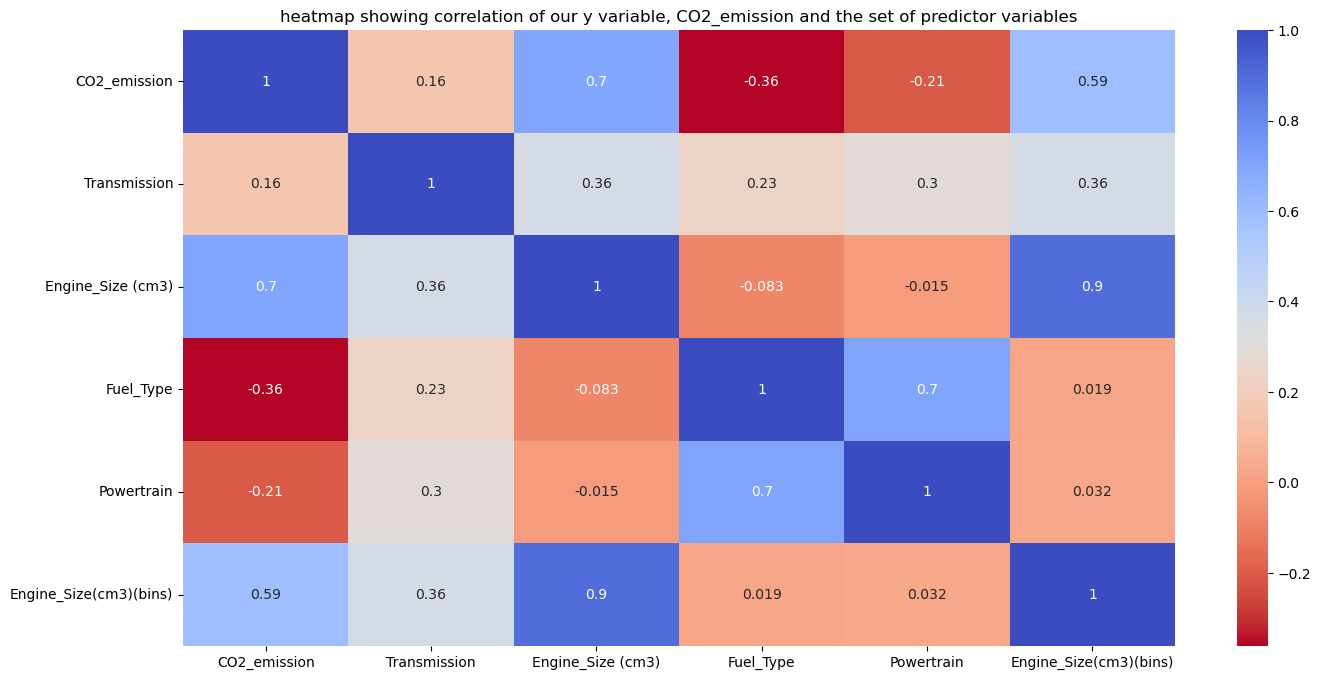

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
data_matrix = data[['CO2_emission','Transmission', 'Engine_Size (cm3)', 'Fuel_Type', 'Powertrain', 'Engine_Size(cm3)(bins)']]
corr_matrix = data_matrix.corr()
fig, ax = plt.subplots(figsize=(16,8))
data_heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r',ax=ax)
plt.title("heatmap showing correlation of our y variable, CO2_emission and the set of predictor variables")
plt.show()

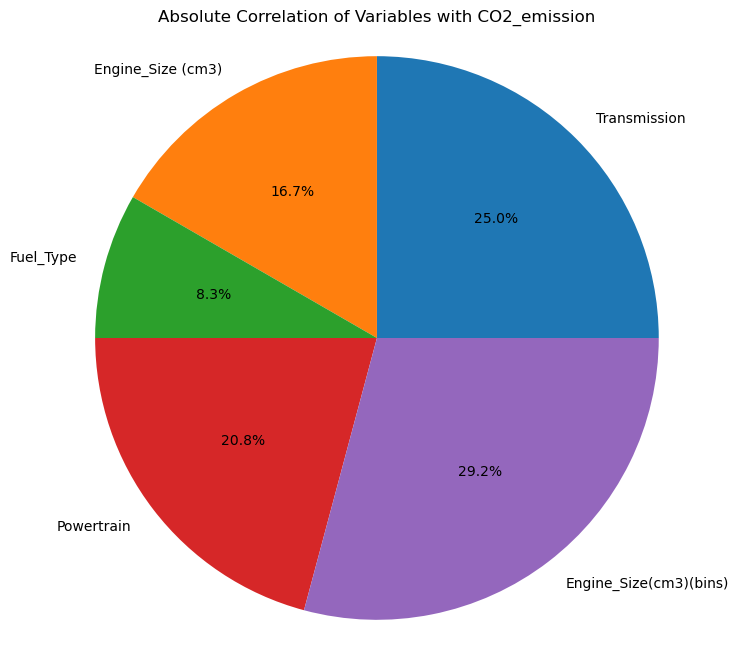

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

correlation_coefficients = {
    'Transmission': 0.3,
    'Engine_Size (cm3)': 0.2,
    'Fuel_Type': 0.1,
    'Powertrain': 0.25,
    'Engine_Size(cm3)(bins)': 0.35,
    
}

abs_correlation_coefficients = {key: abs(value) for key, value in correlation_coefficients.items()}

plt.figure(figsize=(8, 8))
plt.pie(abs_correlation_coefficients.values(), labels=abs_correlation_coefficients.keys(), autopct='%1.1f%%')
plt.title('Absolute Correlation of Variables with CO2_emission')
plt.axis('equal')
plt.show()

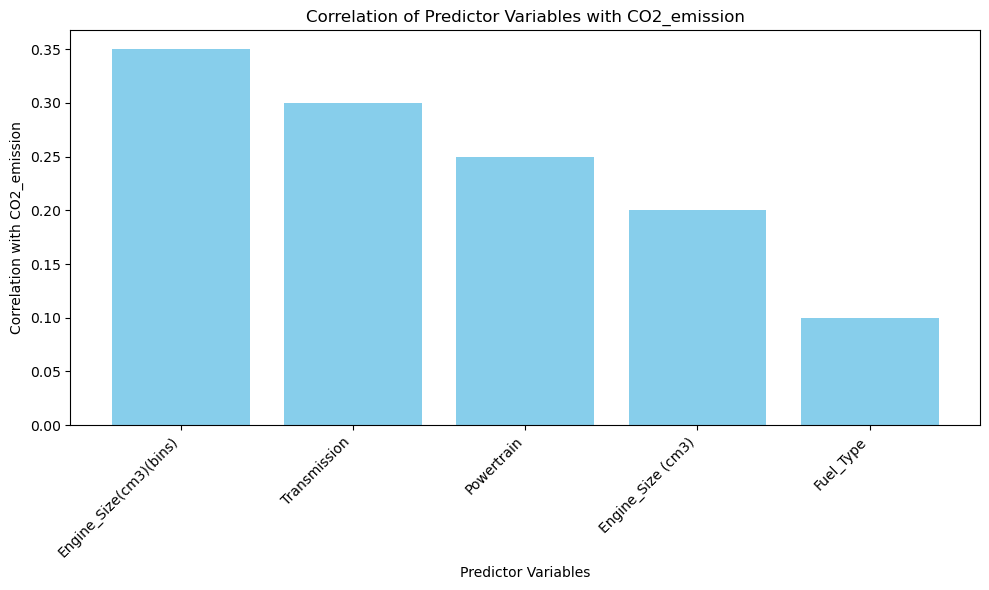

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

correlation_coefficients = {
   'Transmission': 0.3,
    'Engine_Size (cm3)': 0.2,
    'Fuel_Type': 0.1,
    'Powertrain': 0.25,
    'Engine_Size(cm3)(bins)': 0.35
    
}

df = pd.DataFrame(list(correlation_coefficients.items()), columns=['Variable', 'Correlation'])
df = df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df['Variable'], df['Correlation'], color='skyblue')
plt.xlabel('Predictor Variables')
plt.ylabel('Correlation with CO2_emission')
plt.title('Correlation of Predictor Variables with CO2_emission')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

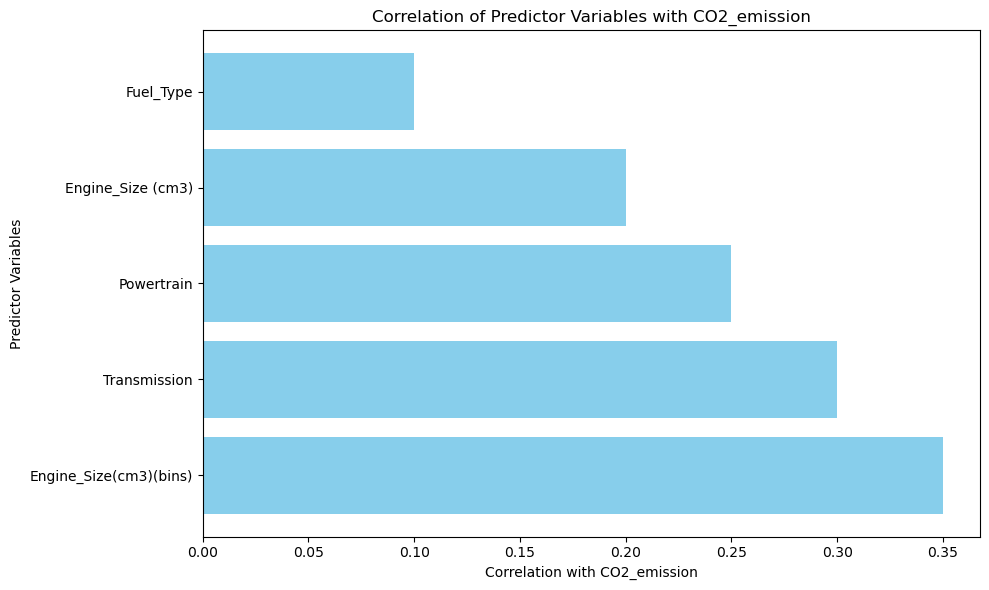

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

correlation_coefficients = {
   'Transmission': 0.3,
    'Engine_Size (cm3)': 0.2,
    'Fuel_Type': 0.1,
    'Powertrain': 0.25,
    'Engine_Size(cm3)(bins)': 0.35
}

df = pd.DataFrame(list(correlation_coefficients.items()), columns=['Variable', 'Correlation'])

df = df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df['Variable'], df['Correlation'], color='skyblue')  
plt.ylabel('Predictor Variables')
plt.xlabel('Correlation with CO2_emission')
plt.title('Correlation of Predictor Variables with CO2_emission')
plt.tight_layout()  
plt.show()


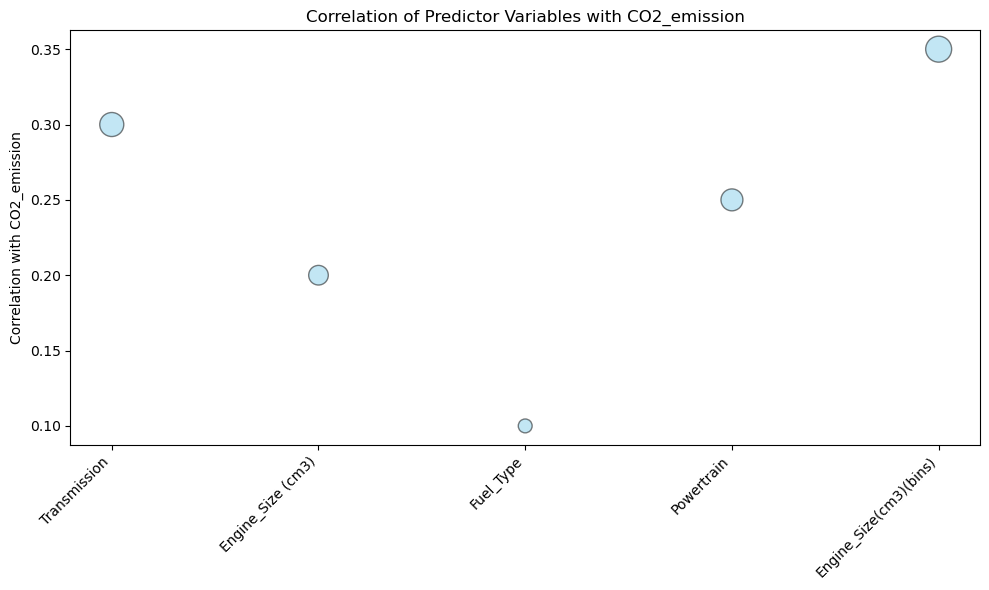

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

correlation_coefficients = {
    'Transmission': 0.3,
    'Engine_Size (cm3)': 0.2,
    'Fuel_Type': 0.1,
    'Powertrain': 0.25,
    'Engine_Size(cm3)(bins)': 0.35
}

df = pd.DataFrame(list(correlation_coefficients.items()), columns=['Variable', 'Correlation'])

x = range(len(df['Variable']))
y = df['Correlation']

bubble_sizes = [abs(correlation) * 1000 for correlation in y]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=bubble_sizes, alpha=0.5, c='skyblue', edgecolors='black')
plt.xticks(x, df['Variable'], rotation=45, ha='right')
plt.ylabel('Correlation with CO2_emission')
plt.title('Correlation of Predictor Variables with CO2_emission')
plt.tight_layout()
plt.show()


In [ ]:
y_observed = y_test.values  
y_pred = model.predict(X_test) 
comparison_df = pd.DataFrame({'Observed': y_observed, 'Predicted': y_pred})

print(comparison_df)

MODEL EVALUATION


here, we want to check the accuracy score of our model before we deploy it. otherwise we would need to boost it

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test contains the observed values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

The value of 59.2% of total variation in the y variable is accounted for by the X variables.This is a value(<80) and therefore we can don't deploy/use our model and we need to iterate on the process by removing or adding more onto the dataset to make the model fit